In [29]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline

### Load original image

(252, 399, 3)

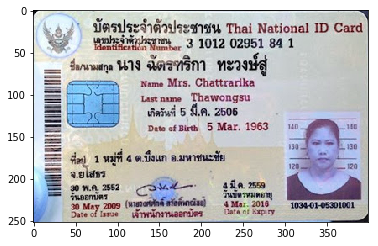

In [30]:
img = cv2.imread("id_covers/beautiful_example_type1.jpg") #model=register_item_02.jpg
plt.imshow(img)
img.shape

### define text masks 

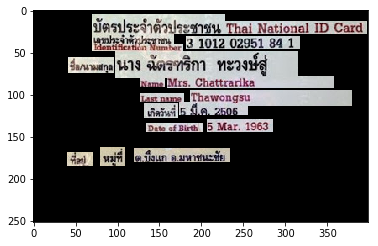

In [105]:
ref = (0, 0)
size = (252, 399)
boxes = get_mask_coords(ref, size)
only_text = show_all_boxes(img, boxes)
result = cv2.bitwise_and(img, img, mask=only_text)
plt.imshow(result)

In [138]:
def get_mask_coords(tl_corner, size, id_type=1) :
    
    #coords = ((top_left_col, top_left_row), (bottom_right_col, bottom_right_row))
    reference_size = (250, 400)
    
    
    ref_col = tl_corner[0]
    ref_row = tl_corner[1]
    if id_type == 1 :
        boxes = {

            "id_card_thai" : ((70, 6), (228, 30)),
            "id_card_eng" :  ((228, 14), (395, 29)),
            "id_num_thai" :  ((70, 30), (167, 41)),
            "id_num_eng" :   ((70, 41), (178, 50)),
            "id_number" : ((181, 32), (316, 47)),

            "unknown1" : ((42, 57), (97, 76)),
            "unknown2" : ((98, 50), (314, 82)),

            "name_english" : ((126, 82), (156, 93)),
            "name_entry_english" : ((159, 80), (357, 94)),
            "last_name_english" : ((127, 100), (179, 110)),
            "last_name_entry" : ((186, 96), (377, 115)),

            "birth_thai" : ((131, 112), (172, 129)),
            "birth_thai_entry" : ((173, 110), (254, 126)),

            "birth_eng" : ((134, 135), (201, 146)),
            "birth_eng_entry" : ((206, 131), (284, 146)),

            "unknown3" : ((41, 170), (72, 187)),
            "unknown4" : ((80, 164), (110, 187)),
            "unknown5" : ((120, 165), (234, 182))        

        }
    
    for b in boxes.keys() :
        tl = boxes[b][0] 
        br = boxes[b][1] 
        scaling_col = size[0]/reference_size[0]
        scaling_row = size[1]/reference_size[1]
        
        #adjust the mask to the reference point and to the size
        boxes[b] = ((int(tl[0]*scaling_col + ref_col),
                     int(tl[1]*scaling_row + ref_row)), 
                    ((int(br[0]*scaling_col + ref_col),
                      int(br[1]*scaling_row + ref_row))))
        
    return boxes

def box_range(box) :
        min_col = box[0][0]
        min_row = box[0][1]
        max_col = box[1][0]
        max_row = box[1][1]
        
        return range(min_col,max_col), range(min_row,max_row)

def show_all_boxes(img, boxes) :    
            
    new_img = np.zeros((img.shape[0], img.shape[1]),  dtype=np.uint8)
        
    for box_name in boxes.keys() :
        ranges = box_range(boxes[box_name])
        for col in ranges[0] :
            for row in ranges[1] :
                new_img[row, col] = 255
            
    return new_img

def show_box(img, boxes, box_name) :
    ranges = box_range(boxes[box_name])
    new_img = np.zeros((len(ranges[1]), len(ranges[0]), 3),  dtype=np.uint8)
    
    print(len(ranges[0]), len(ranges[1]))
    
    for col in ranges[0] :
        for row in ranges[1] :
            new_img[row - ranges[1][0], col - ranges[0][0]] = img[row, col]
    return new_img
    

### Only specific box

169 15


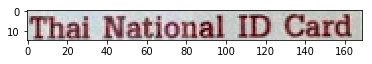

In [141]:
ref = (0, 0)
size = (252, 399)
boxes = get_mask_coords(ref, size)
result = show_box(img, boxes, 'id_card_eng')
plt.imshow(result)